In [59]:
import subprocess
import re
import time
import glob
from IPython.display import display, Image, clear_output

#Format: python3 vrp_GA.py [Population Size] [Iterations] < input.txt
command1 = "python3 vrp_GA.py 400 100 < input.txt"
command2 = "python3 vrp_BO.py 400 100 < input.txt"

with open('input.txt', 'r') as file:
    data = file.read()

In [60]:
start_time = time.time()

process = subprocess.Popen(command1, stdout=subprocess.PIPE, shell=True, text=True)
output, _ = process.communicate()

end_time = time.time()
time1 = end_time - start_time

split1 = output.split('\n')
cost1 = split1[-1]
route1 = split1[:-1]

start_time = time.time()

process = subprocess.Popen(command2, stdout=subprocess.PIPE, shell=True, text=True)
output, _ = process.communicate()

end_time = time.time()
time2 = end_time - start_time

split2 = output.split('\n')
cost2 = split2[-1]
route2 = split2[:-1]

In [62]:
print(f"Genetic Algorithm - Cost: {cost1}, Time: {time1}")
print(f"Bonobo Optimization - Cost: {cost2}, Time: {time2}")

Genetic Algorithm - Cost: 209.602329, Time: 30.841182947158813
Bonobo Optimization - Cost: 182.514548, Time: 654.1785531044006


In [63]:
coordinates = re.findall(r'node\d+\s+\S+\s+([-]?\d+\.\d+)\s+([-]?\d+\.\d+)', data)

coordinates_list = [(0.0, 0.0)]
coordinates_list+=[(float(x), float(y)) for x, y in coordinates]

In [64]:
import cv2
import numpy as np

route1 = [int(node) for node in route1]
route2 = [int(node) for node in route2]

route_coordinates1 = [(int(coordinates_list[node][0]),int(coordinates_list[node][1])) for node in route1]
route_coordinates2 = [(int(coordinates_list[node][0]),int(coordinates_list[node][1])) for node in route2]

In [65]:
def display_image(img):
    _, encoded_img = cv2.imencode('.png', img)
    display(Image(data=encoded_img))

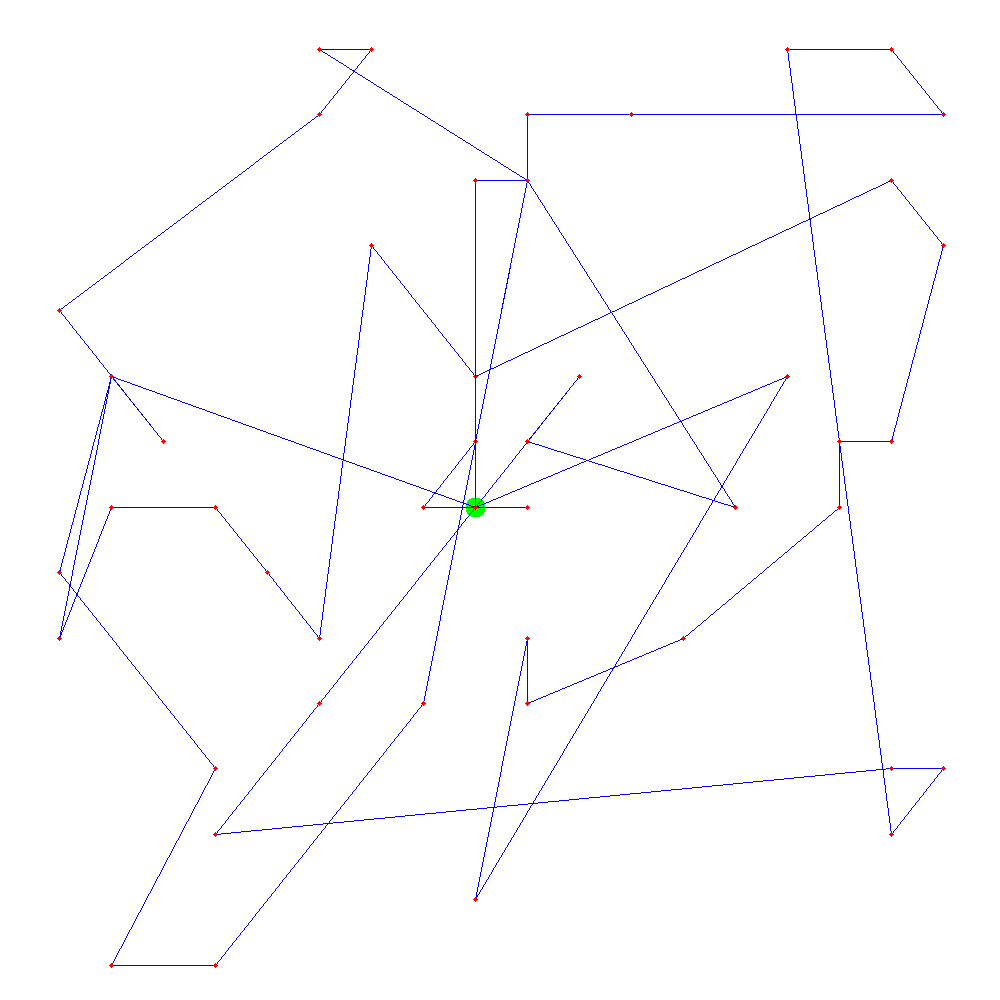

In [66]:
image_size = 1000
image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255

x_coords = [coord[0] for coord in coordinates_list]
y_coords = [coord[1] for coord in coordinates_list]

x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)

def normalize(value, min_value, max_value, image_dim):
    return int((value - min_value) / (max_value - min_value) * (image_dim - 20) + 10)

depot_x = normalize(coordinates_list[0][0], x_min, x_max, image_size)
depot_y = normalize(coordinates_list[0][1], y_min, y_max, image_size)
cv2.circle(image, (depot_x, image_size - depot_y), 10, (0, 255, 0), -1)  # Green color for depot

for i in range(len(route_coordinates1) - 1):
    x1 = normalize(route_coordinates1[i][0], x_min, x_max, image_size)
    y1 = normalize(route_coordinates1[i][1], y_min, y_max, image_size)
    x2 = normalize(route_coordinates1[i + 1][0], x_min, x_max, image_size)
    y2 = normalize(route_coordinates1[i + 1][1], y_min, y_max, image_size)

    cv2.line(image, (x1, image_size - y1), (x2, image_size - y2), (255, 0, 0), 1)
    cv2.circle(image, (x1, image_size - y1), 2, (0, 0, 255), -1)

    clear_output(wait=True)
    display_image(image)
    time.sleep(0.2)  

x_last = normalize(route_coordinates1[-1][0], x_min, x_max, image_size)
y_last = normalize(route_coordinates1[-1][1], y_min, y_max, image_size)
cv2.circle(image, (x_last, image_size - y_last), 2, (0, 0, 255), -1)

clear_output(wait=True)
display_image(image)

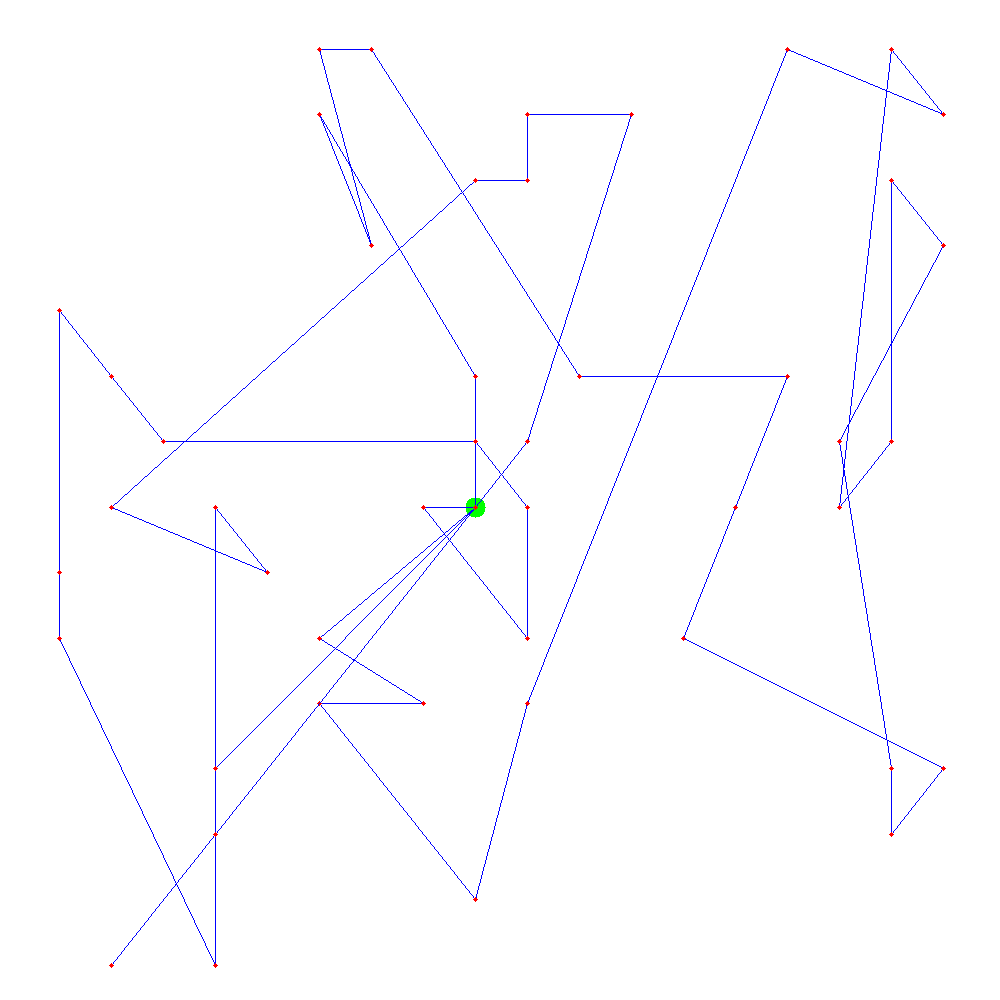

In [67]:
image_size = 1000
image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255

x_coords = [coord[0] for coord in coordinates_list]
y_coords = [coord[1] for coord in coordinates_list]

x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)

def normalize(value, min_value, max_value, image_dim):
    return int((value - min_value) / (max_value - min_value) * (image_dim - 20) + 10)

depot_x = normalize(coordinates_list[0][0], x_min, x_max, image_size)
depot_y = normalize(coordinates_list[0][1], y_min, y_max, image_size)
cv2.circle(image, (depot_x, image_size - depot_y), 10, (0, 255, 0), -1)  # Green color for depot

for i in range(len(route_coordinates2) - 1):
    x1 = normalize(route_coordinates2[i][0], x_min, x_max, image_size)
    y1 = normalize(route_coordinates2[i][1], y_min, y_max, image_size)
    x2 = normalize(route_coordinates2[i + 1][0], x_min, x_max, image_size)
    y2 = normalize(route_coordinates2[i + 1][1], y_min, y_max, image_size)

    cv2.line(image, (x1, image_size - y1), (x2, image_size - y2), (255, 0, 0), 1)
    cv2.circle(image, (x1, image_size - y1), 2, (0, 0, 255), -1)

    clear_output(wait=True)
    display_image(image)
    time.sleep(0.2)  

x_last = normalize(route_coordinates2[-1][0], x_min, x_max, image_size)
y_last = normalize(route_coordinates2[-1][1], y_min, y_max, image_size)
cv2.circle(image, (x_last, image_size - y_last), 2, (0, 0, 255), -1)

clear_output(wait=True)
display_image(image)